In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:\Amaan\Coding\College\FOML\Code\M2\data\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [1]:
from sklearn.svm import SVC

In [5]:
clf = SVC(kernel='poly', degree=10)
clf.fit(X, y)

SVC(degree=10, kernel='poly')

In [6]:
len(clf.support_)

60

In [7]:
clf.predict(X)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y, clf.predict(X))

0.8240740740740741

In [9]:
confusion_matrix(y, clf.predict(X))

array([[69,  1],
       [18, 20]], dtype=int64)

In [28]:
len(X[0])

2

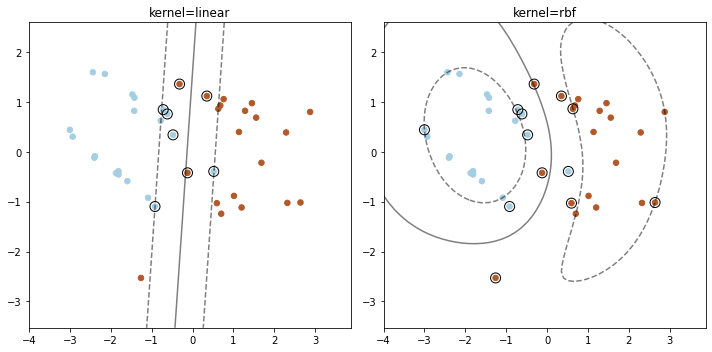

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

X, y = make_classification(n_samples=40, n_features=2, n_redundant=0, random_state=0)

plt.figure(figsize=(10, 5))
for i, k in enumerate(['linear', 'rbf']):
    # "hinge" is the standard SVM loss
    clf = SVC(C=1, kernel=k , random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("kernel=" + str(k))
plt.tight_layout()
plt.show()